# **End to End Pizza Steak Binary Image Classification project**
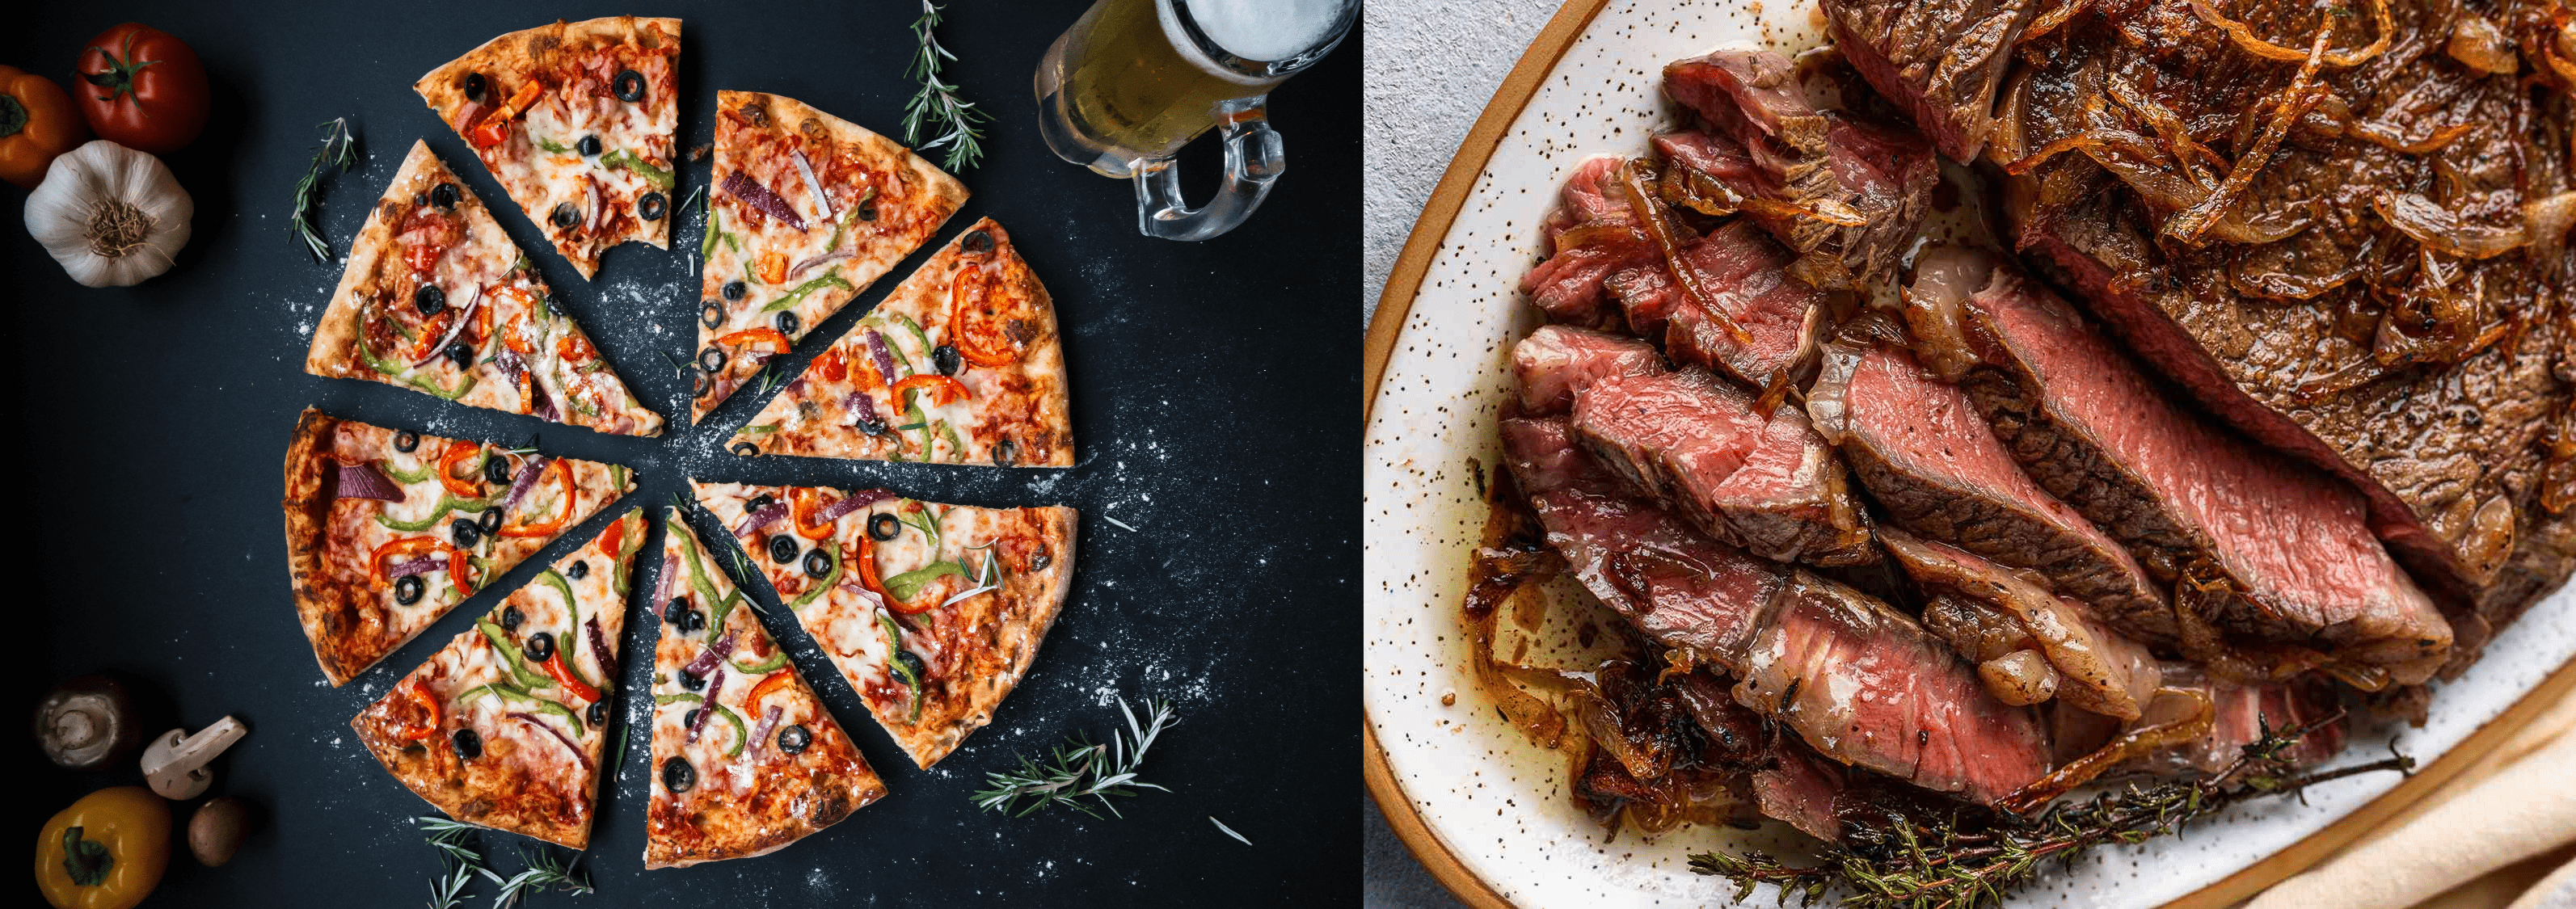


In this notebook, my aim is to utilize the food101 dataset for the purpose of training convolutional neural networks. The main focus of this endeavor is to effectively classify the wide array of food types present within the dataset. To embark on this journey, I will initiate the process by tackling a binary classification task that involves discerning between two delectable dishes: pizza and steak. Following the successful execution of this binary classification, I intend to expand the scope of our classification efforts to encompass a more extensive variety of food items. This incremental approach will facilitate the progressive development and assessment of convolutional neural networks, allowing them to adeptly handle the intricate task of categorizing diverse types of cuisine.

# What I am going to cover
1. Preparing the dataset for utilization (pizza_steak)
2. Configuring a convolutional neural network (CNN) architecture using TensorFlow
3. A comprehensive project for binary image classification from start to finish
4. The stages involved in CNN modeling:
> Constructing a CNN, configuring model compilation, executing model fitting, and assessing model performance
5. Addressing a complete multi-class image classification scenario
6. Generating predictions on images of our own choosing

## Getting the data
The dataset being used is Food 101

This dataset has 101000 images in total. It's a food dataset with 101 categories(multiclass)
Each type of food has 750 training samples and 250 test samples

*Note found on the webpage of the dataset :*


On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.*

The entire dataset is 5GB in size

The images I'll be working with are from the Food101 dataset. (101 different classes of food).

However, I'll modify it to only use two classes (pizza and steak)
Working with a smaller dataset helps in experimentation to quickly figure out what works or better yer what doesn't before scaling up

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-05 20:35:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 108.177.13.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   191MB/s    in 0.5s    

2023-09-05 20:35:13 (191 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data
Becoming "one with the data" refers to gaining a deep understanding of the dataset you're working with when developing a deep learning project. This understanding is crucial for several reasons:

1. **Data Quality and Preprocessing:** Deep learning models are highly sensitive to the quality and characteristics of the input data. By immersing yourself in the data, you can identify anomalies, missing values, outliers, and other issues that might impact the model's performance. This allows you to perform necessary data preprocessing steps to clean and prepare the data appropriately.

2. **Feature Engineering:** Understanding the data helps you identify relevant features and relationships that can potentially improve your model's performance. You can engineer new features or transform existing ones based on your knowledge of the data domain, which could lead to better model representations.

3. **Model Selection and Architecture:** Different data distributions might require different model architectures. By deeply understanding the data, you can select or design a model architecture that's suitable for the task. For instance, if you're working with image data, you might choose convolutional neural networks (CNNs), while for sequential data, recurrent neural networks (RNNs) might be more appropriate.

4. **Hyperparameter Tuning:** Many hyperparameters, such as learning rate, batch size, and regularization strength, influence how a model learns from the data. Having an intimate knowledge of the data can guide you in setting these hyperparameters effectively, improving the convergence and performance of your model.

5. **Domain Knowledge:** Some insights might not be obvious from the data alone. Having domain knowledge can help you make informed decisions about how to handle specific cases or anomalies that arise during model training and evaluation.

6. **Data Augmentation:** Data augmentation techniques, such as image rotation, flipping, or cropping, can help improve the model's generalization by exposing it to more diverse examples. Understanding the data allows you to apply these techniques effectively.

7. **Avoiding Bias and Ethical Concerns:** Deep learning models can inadvertently learn biases present in the data. By thoroughly understanding the data, you can identify potential sources of bias and take steps to mitigate them, ensuring that your model's predictions are fair and ethical.

8. **Interpreting Results:** When your model is trained and making predictions, understanding the data helps you interpret the results. You'll have a better grasp of why the model is making certain predictions and whether those predictions make sense in the context of the data.

In essence, becoming one with the data is about going beyond simply treating the data as inputs for your model. It involves developing an intuition about the data, its characteristics, and its quirks, which can greatly enhance the effectiveness of your deep learning project from preprocessing to model evaluation.

In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and  {len(filenames)} images in '(dirpath)'.")

There are 2 directories and  0 images in '(dirpath)'.
There are 2 directories and  0 images in '(dirpath)'.
There are 0 directories and  750 images in '(dirpath)'.
There are 0 directories and  750 images in '(dirpath)'.
There are 2 directories and  0 images in '(dirpath)'.
There are 0 directories and  250 images in '(dirpath)'.
There are 0 directories and  250 images in '(dirpath)'.


In [6]:
!ls pizza_steak

test  train


In [7]:

# Alternative way
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

### Visualize the images

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of names from the subdirectories in the training folder
print(class_names)

['pizza' 'steak']


In [9]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep  5 18:17 .
drwxr-xr-x 1 root root 4096 Sep  5 20:35 ..
drwxr-xr-x 4 root root 4096 Sep  5 18:17 test
drwxr-xr-x 4 root root 4096 Sep  5 18:17 train


In [10]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory(view the images from here)
  target_folder = target_dir + target_class

  # Getn a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") # show the shape of the image

  return img

image shape: (512, 512, 3)


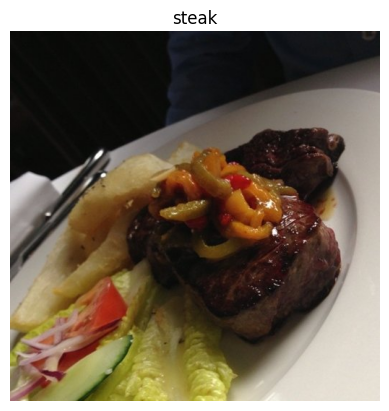

In [11]:
# View a random image from the training set
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [12]:
# Now using tensorflow
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  9,   9,   7],
        [  9,   9,   7],
        [  9,   9,   7],
        ...,
        [ 17,  21,  22],
        [ 17,  21,  24],
        [ 17,  22,  25]],

       [[  9,   9,   7],
        [  9,   9,   7],
        [  9,   9,   7],
        ...,
        [ 18,  22,  23],
        [ 18,  22,  25],
        [ 18,  23,  26]],

       [[ 10,  10,   8],
        [ 10,  10,   8],
        [ 10,  10,   8],
        ...,
        [ 19,  23,  24],
        [ 18,  22,  25],
        [ 17,  22,  25]],

       ...,

       [[169, 120, 123],
        [163, 114, 117],
        [159, 110, 113],
        ...,
        [232, 225, 215],
        [233, 226, 216],
        [234, 227, 217]],

       [[164, 113, 118],
        [160, 109, 114],
        [159, 108, 113],
        ...,
        [233, 226, 216],
        [234, 227, 217],
        [234, 227, 217]],

       [[164, 113, 118],
        [161, 110, 115],
        [160, 109, 116],
        ...,
        [234, 227, 21

In [13]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

Since Machine learnig models including  tensorflow neural networks prefer the values they work with to be between 0 and 1.
This scaling method is known as **Normalization**.

Since were working with images, the pixel values of the images are scaled by dividing with 255 which is maximum pixel value

In [14]:
# Normalize the tensor to get values between 0 an 1
img/255

array([[[0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.06666667, 0.08235294, 0.08627451],
        [0.06666667, 0.08235294, 0.09411765],
        [0.06666667, 0.08627451, 0.09803922]],

       [[0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.07058824, 0.08627451, 0.09019608],
        [0.07058824, 0.08627451, 0.09803922],
        [0.07058824, 0.09019608, 0.10196078]],

       [[0.03921569, 0.03921569, 0.03137255],
        [0.03921569, 0.03921569, 0.03137255],
        [0.03921569, 0.03921569, 0.03137255],
        ...,
        [0.0745098 , 0.09019608, 0.09411765],
        [0.07058824, 0.08627451, 0.09803922],
        [0.06666667, 0.08627451, 0.09803922]],

       ...,

       [[0.6627451 , 0.47058824, 0.48235294],
        [0.63921569, 0.44705882, 0.45882353],
        [0.62352941, 0

CNNs are designed to automatically learn relevant features from images and are well-suited for tasks like image classification, object detection, and more. Here's a general outline of how you could create a CNN for image analysis:

1. **Dataset Preparation**: Start by collecting and preparing your dataset. This involves gathering labeled images for training and possibly validation/testing. Ensure that your dataset is properly structured and split.

2. **Data Augmentation**: To improve the model's ability to generalize, you can apply data augmentation techniques like rotation, scaling, flipping, and cropping to create variations of your images.

3. **Model Architecture**: Design your CNN architecture. A typical CNN consists of convolutional layers for feature extraction, followed by pooling layers to reduce dimensionality, and then fully connected layers for classification/regression. You can use existing architectures like VGG, ResNet, or design your own.

4. **Normalization**: You don't need to manually normalize images one by one when using a CNN. Instead, normalization layers can be included in your CNN architecture, which will handle the normalization process as part of the model training.

5. **Loss Function**: Choose an appropriate loss function based on your task. For image classification, you might use categorical cross-entropy.

6. **Optimizer**: Select an optimizer like SGD, Adam, or RMSprop to update the model's weights during training.

7. **Training**: Train the model using your training dataset. Feed batches of images through the network, compute the loss, and update the model's weights to minimize the loss. Monitor the performance on a validation set to avoid overfitting.

8. **Evaluation**: Once training is complete, evaluate the model on a separate test dataset to assess its performance.

9. **Fine-tuning**: Depending on the results, you might need to fine-tune hyperparameters, adjust the architecture, or even try different architectures to achieve better performance.

10. **Inference**: Once your model is trained and evaluated, you can use it to make predictions on new, unseen images.



# Building a CNN to find patterns in  our images
What to cover:
* Load the images
* Preprocess our images
* Build our CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 136ms/step - loss: 0.5561 - accuracy: 0.7167 - val_loss: 0.4429 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4358 - accuracy: 0.7993 - val_loss: 0.3451 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4463 - accuracy: 0.8033 - val_loss: 0.3389 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3868 - accuracy: 0.8313 - val_loss: 0.3146 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3466 - accuracy: 0.8547 - val_loss: 0.2830 - val_accuracy: 0.8860


In [16]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Tinker a model from the tensorflow playground

I went to the TensorFlow Playground website and adjusted several default settings to match my preferences. I conducted training sessions until I achieved the desired outcomes. The modified CNN's ultimate output is the result of my fine-tuning efforts in this notebook, specifically for 'model_2'.

In actuality, I won't be constructing a CNN; instead, I'll be developing a more generalized neural network model. I intend to create two models to demonstrate a contrast between the parameters employed in a CNN and those in a general neural network. I'll be showcasing the achieved accuracy for both cases. As for the neural network model labeled as 'model_2', I anticipate that enhancements will be necessary. I can already foresee that it will make predictions...



In [17]:
# set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Plaground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(224,224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.9226 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,121
Trainable params: 602,121
Non-trainable params: 0
_________________________________________________________________


Despite model_2 having more parameters than model_1, model_2  performs horrendously. Create model_3 and make improvements on the model

In [19]:
# Create model_3
# set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),# use dense 100 instead of 4
    tf.keras.layers.Dense(100, activation='relu'),# add an extra layer of dense
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid is the output funtion
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 4.2551 - accuracy: 0.6367 - val_loss: 0.5512 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.7805 - accuracy: 0.7107 - val_loss: 0.5092 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.7720 - accuracy: 0.7060 - val_loss: 0.4402 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.6421 - val_accuracy: 0.7220
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6625 - accuracy: 0.7420 - val_loss: 0.5054 - val_accuracy: 0.7840


In [20]:

# Get a summary of  model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Model_3 performs better than guessing. It has 500x more parameters than our CNN and yet not even close to the accuracy output by the CNN.

**Deductions:**
* Model_3 performs better than guessing. It has 500x more parameters than our CNN and yet not even close to the accuracy output by the CNN.
* From the observed results, it is evident that Model_3 is operating with a level of proficiency that surpasses random guessing. This suggests that the model has learned meaningful patterns and information from the data. However, even with its substantial parameter count, which is 500 times greater than our CNN, Model_3 still falls notably behind the CNN in terms of accuracy. This implies that the sheer number of parameters alone does not guarantee superior performance. Other factors, such as the architecture's design and how the parameters are utilized, likely play a crucial role in determining the model's effectiveness.
* This comparison reinforces the notion that the effectiveness of a model isn't solely determined by the number of parameters, but rather by a complex interplay of architecture, data preprocessing, and training strategies

image shape: (512, 512, 3)
image shape: (384, 512, 3)


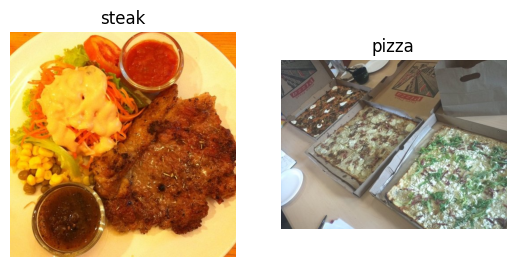

In [21]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", 'steak')
plt.subplot(1,2,2)
pizza_img =  view_random_image("pizza_steak/train/", 'pizza')

## Preparing the data for modeling


In [22]:
# Define directory dataset paths
train_dir  = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

## Coverting the data into batches
In deep learning, a "batch" refers to a subset of the training data that is used to update the model's parameters during the training process. Instead of updating the model's parameters after every individual data point, which can be computationally inefficient and result in noisy updates, training is typically done using batches of data.

### **Batches are important in deep learning for several reasons:**

1. **Efficiency:** Training a deep learning model involves performing numerous calculations for each data point. By using batches, these calculations can be parallelized and optimized for modern hardware, such as GPUs. This speeds up the training process significantly.

2. **Memory Usage:** Deep learning models often require a large amount of memory, especially when dealing with complex architectures or large datasets. Batching allows the model to process chunks of data at a time, reducing the memory requirements compared to processing the entire dataset at once.

3. **Stability:** Using batches of data helps to stabilize and smoothen the training process. The gradients (derivatives of the loss function with respect to the model's parameters) calculated from a batch provide a more representative estimate of the overall dataset's gradients, reducing the impact of noisy or outlier data points.

4. **Regularization:** Mini-batch training introduces a form of regularization due to the stochastic nature of selecting data samples. This can help prevent overfitting by adding a level of noise to the optimization process.

5. **Convergence:** Batching can improve convergence during training. Smaller batches may allow the model to escape local minima, while larger batches might help it settle into more stable regions of the loss landscape.

6. **Adaptability:** Using batches enables techniques like stochastic gradient descent (SGD) and its variations, which introduce randomness in parameter updates. This can lead to better generalization, as the model doesn't strictly adhere to the same gradient direction in every iteration.

In practice, the choice of batch size is a trade-off. Larger batch sizes can lead to faster convergence due to more accurate gradient estimates, but they require more memory and computational resources. Smaller batch sizes can offer better generalization, but the training process might be slower due to more frequent parameter updates. The selection of an appropriate batch size often involves experimentation and depends on the specific problem, architecture, and available resources.

In [23]:
!nvidia-smi

Tue Sep  5 20:37:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |   2955MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [25]:
# Load image data from directories and turn it into batches
train_data  = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                                 target_size =(224,224), # target size of images (height, width)
                                                 class_mode = 'binary', # type of data you're working with
                                                 batch_size = 32) # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size= (224, 224),
                                             class_mode = 'binary',
                                             batch_size= 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Getting a sample of a train data batch
images, labels = train_data.next() # get the 'next' bathc of images/labels in train data
len(images), len(labels)

(32, 32)

In [27]:
 # How many batches are there?
 len(train_data)

47

In [28]:
tf.constant(images[7])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.11764707],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.26666668, 0.13333334, 0.19607845],
        [0.32941177, 0.20000002, 0.23529413],
        [0.42352945, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.13333334],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5647059 ],
        [0.60

In [29]:
images[7].shape

(224, 224, 3)

# Create a CNN model
**Startoff with a baseline**

A baseline in a relatively simple model or existing result that you setup to when beginning the machine learning experiment and  then keep experimenting to beat the baseline

**Note** In deep learning, there are almost an infinite amount of architecures to create. So one of the best ways to get started is with something simple and see if it works on the data and then introduce complexities as required(look at which model is performing best in the field for your model)

In [30]:
# import the  needed packages
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [32]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [33]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 142ms/step - loss: 1.7652 - accuracy: 0.6267 - val_loss: 0.4793 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4441 - accuracy: 0.8087 - val_loss: 0.3837 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3737 - accuracy: 0.8447 - val_loss: 0.3491 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3155 - accuracy: 0.8707 - val_loss: 0.3465 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.2402 - accuracy: 0.9220 - val_loss: 0.3317 - val_accuracy: 0.8720


In [34]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 77ms/step - loss: 0.2830 - accuracy: 0.8860


[0.2829892039299011, 0.8859999775886536]

In [35]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 78ms/step - loss: 0.3317 - accuracy: 0.8720


[0.33172929286956787, 0.871999979019165]

## Evaluating the model

<Axes: >

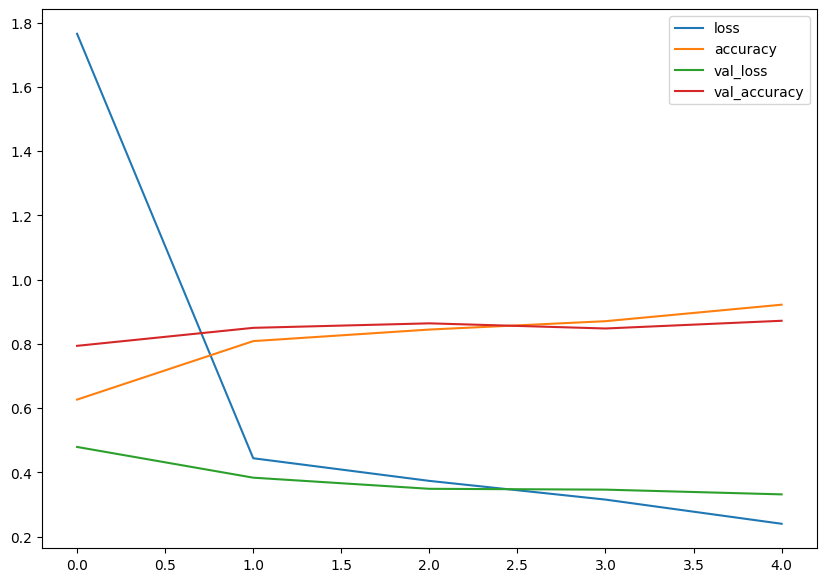

In [36]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

The *loss* start really and hight and starts decreasing sharply

The *accuracy* starts low, increases sharply until the inflexion point and the increases steadily while the loss also decreases

The *validation loss* also follows the same trend only that  it tends to almost flatten.

Similary, the *validation accuracy* also follows the same trend as  the validation loss only that it rises steadily and almost seems to flatten

In [37]:
# Plot the validation and training curves separately
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation metrics. (This is also possible by use of callbacks)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot the accuray
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

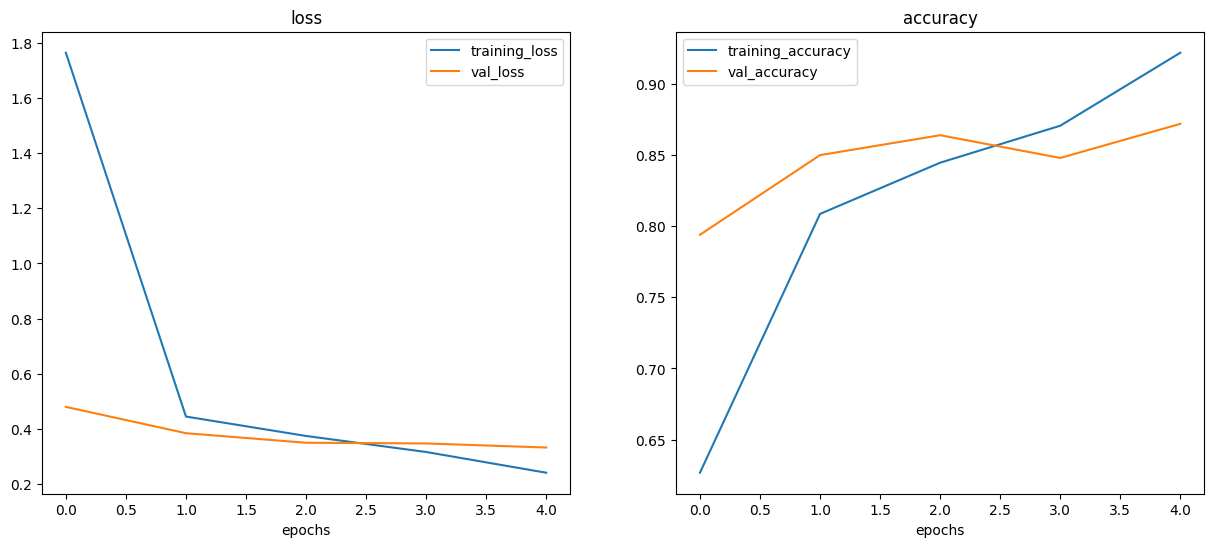

In [38]:
# Check the loss and accuracy of model_4
plot_loss_curve(history_4)

## Adjust the model parameters

Fitting a machine lerning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting
* Increase the number of Conv layers i.e make the model deeper
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting
* Add data augmentation
* Add regualarization layers (such as MaxPool2D)
* Add more data

**Note** Reducing ovefitting is also known as regularization

In [39]:
 # Create the model (new baseline)
 model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
 ])

In [40]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 119ms/step - loss: 0.6001 - accuracy: 0.6853 - val_loss: 0.4733 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4796 - accuracy: 0.7800 - val_loss: 0.3712 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4481 - accuracy: 0.7920 - val_loss: 0.4544 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4083 - accuracy: 0.8287 - val_loss: 0.3447 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3752 - accuracy: 0.8320 - val_loss: 0.3397 - val_accuracy: 0.8500


In [42]:
# Get the summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [43]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


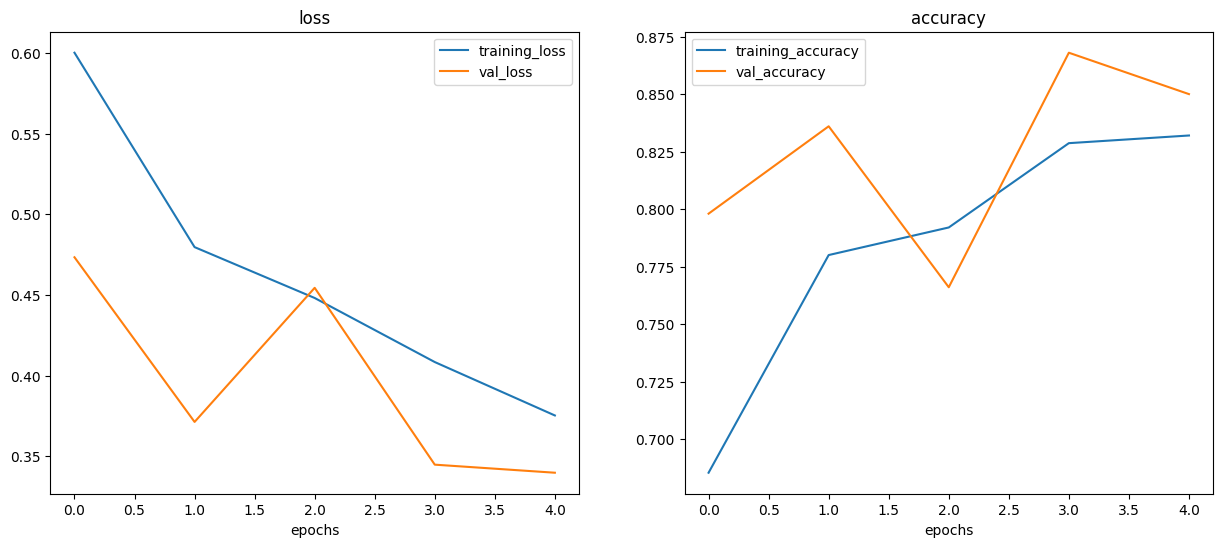

In [44]:
# Plot the loss curves
plot_loss_curve(history_5)

### Data Augmentation
Image data augmentation is a technique that creates new images from existing ones. To do that, you make some small changes to them, such as adjusting the brightness of the image, or rotating the image, or shifting the subject in the image horizontally or vertically

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


### Try training the model with unshuffled data

In [46]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


**Note** Data augmentation is only done on training data

In [47]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_aug.next() # labes aren't augmented, only data images

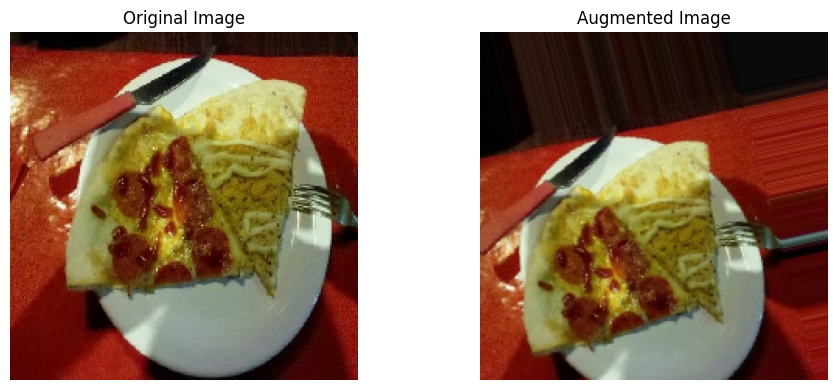

In [48]:
# Show the original image and the augmented_image
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 32)

plt.figure(figsize=(10, 4))  # Set the figure size to accommodate both images side by side

# Original image
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


In [49]:
# Train a model using the augmented images
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 419ms/step - loss: 0.7209 - accuracy: 0.5447 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 427ms/step - loss: 0.7015 - accuracy: 0.5227 - val_loss: 0.6727 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 20s 419ms/step - loss: 0.6850 - accuracy: 0.5700 - val_loss: 0.6369 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6489 - accuracy: 0.6560 - val_loss: 0.5552 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6243 - accuracy: 0.6460 - val_loss: 0.4871 - val_accuracy: 0.7720


In [50]:
model_6.evaluate(test_data)

16/16 [==============================] - 1s 77ms/step - loss: 0.4871 - accuracy: 0.7720


[0.4870952367782593, 0.7720000147819519]

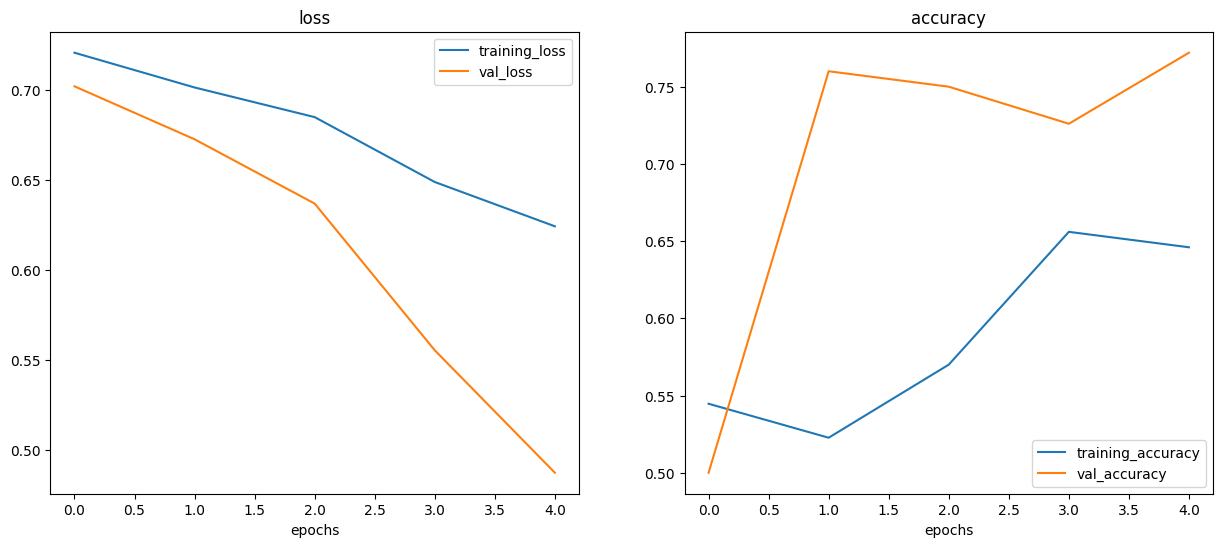

In [51]:
# Plot the loss curve
plot_loss_curve(history_6)

 An over-constrained model will likely underfit the limited training dataset, while an under-constrained model would likely overfit the training data, resulting in poor performance in both cases

 One way of avoiding augmentation poor performance is using shuffled data

### Training with shuffled data

In [52]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [53]:
# Train a model using the augmented images
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 425ms/step - loss: 0.6609 - accuracy: 0.5973 - val_loss: 0.5175 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 19s 409ms/step - loss: 0.5508 - accuracy: 0.7253 - val_loss: 0.4142 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 19s 407ms/step - loss: 0.5137 - accuracy: 0.7533 - val_loss: 0.3991 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5114 - accuracy: 0.7493 - val_loss: 0.4073 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 19s 414ms/step - loss: 0.4758 - accuracy: 0.7800 - val_loss: 0.3905 - val_accuracy: 0.8360


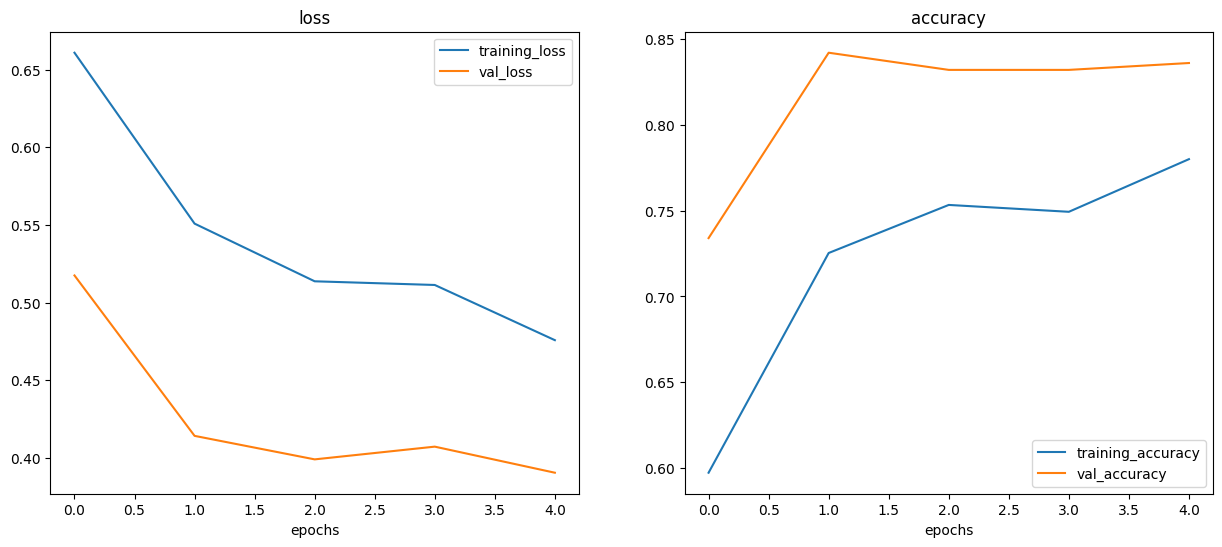

In [54]:
plot_loss_curve(history_7)

**There is a significant improvement in the accuracy:**

This is because, when shuffling the training data, the model gets exposed to all diffferent kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza and steak)

## Repeat until satisfied

Since I've already beaten the baseline, there are a few things I could try to continue improvoing the model:

* Increase the number of model layers(eg. add more 'Conv2D'/'MaxPool2D' layers
* Increase the number of filters in each convolutional layer (eg. from 10 to 32 or 64)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data(give the model more opportunities  to learn)
* Use **Transfer Learning** to leverage what another image model has learn and adjust it for our own use case

## Making a prediction with our trained model on custom data

In [55]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


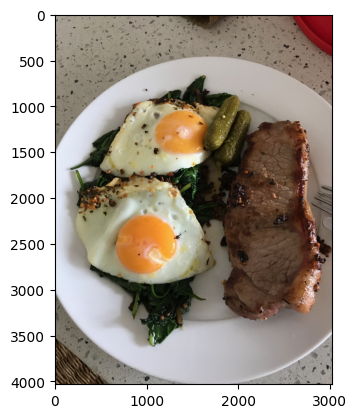

In [56]:
# View example image
import matplotlib.image as mpimg
steak =  mpimg.imread('/content/03-steak.jpeg')
plt.imshow(steak);

In [57]:
# Check the shape
steak.shape

(4032, 3024, 3)

In [58]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

**Before making the prediction, make sure that the data is preprocessed into the same format that the model was trained on**

In [59]:
# Create a function to import an image and resize it to be able to be used with the model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [60]:
# Load in and preprocess our custom image
steak = load_and_prep_image('/content/03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [61]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 170ms/step


### Visualize the image as well as the prediction

In [62]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [64]:
# Create a function to predict and plot
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makeds a prediction with modle and plots hte image with the predicted clas as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


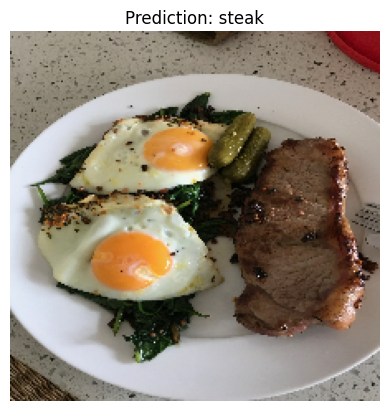

In [65]:
# Test the model on a custom image
pred_and_plot(model_7, '/content/03-steak.jpeg')

1/1 [==============================] - 0s 19ms/step


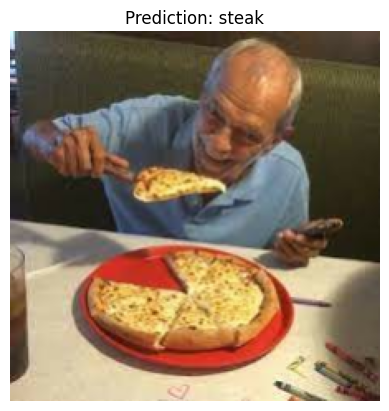

In [66]:
# Try another image
pred_and_plot(model_7, '/content/pizza_dad.jpeg')

## Multiclass Image Classification - using 10 classes of food

1. Achieve unity with the data.
2. Prepare the data for modeling through preprocessing.
3. Begin modeling, initially establishing a baseline.
4. Train the model, even overfitting if necessary to verify functionality.
5. Assess the model's performance.
6. Fine-tune various hyperparameters to enhance the model, aiming to surpass the baseline or reduce overfitting.
7. Iteratively repeat these steps until content with the results.


In [67]:
### import the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip  the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2023-09-05 20:42:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  99.2MB/s    in 6.5s    

2023-09-05 20:43:00 (76.5 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [68]:
import os

# walk through the data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in  '{dirpath}'.")

There are 2 directories and 0 images in  '10_food_classes_all_data'.
There are 10 directories and 0 images in  '10_food_classes_all_data/train'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in  '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in  '10_food_classes_all_data/t

In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [70]:
# Get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (512, 512, 3)


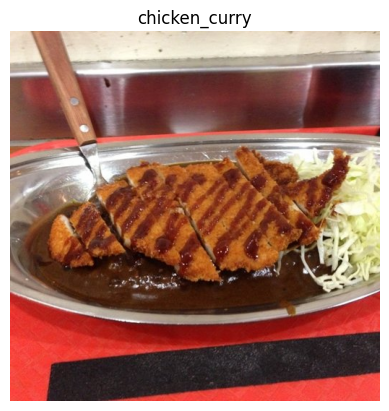

In [71]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the data

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical'
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [73]:
## Create a model starting with a baseline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # Softmax for multiclass
])

# compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [74]:
# Fit the modlel
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 131ms/step - loss: 2.1571 - accuracy: 0.1936 - val_loss: 2.0809 - val_accuracy: 0.2344
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.9920 - accuracy: 0.2969 - val_loss: 1.8973 - val_accuracy: 0.3328
Epoch 3/5
235/235 [==============================] - 28s 117ms/step - loss: 1.7079 - accuracy: 0.4119 - val_loss: 1.9397 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 1.2549 - accuracy: 0.5815 - val_loss: 2.0283 - val_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.6780 - accuracy: 0.7839 - val_loss: 2.8099 - val_accuracy: 0.2948


In [75]:
# Evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 2.8099 - accuracy: 0.2948


[2.8098769187927246, 0.2948000133037567]

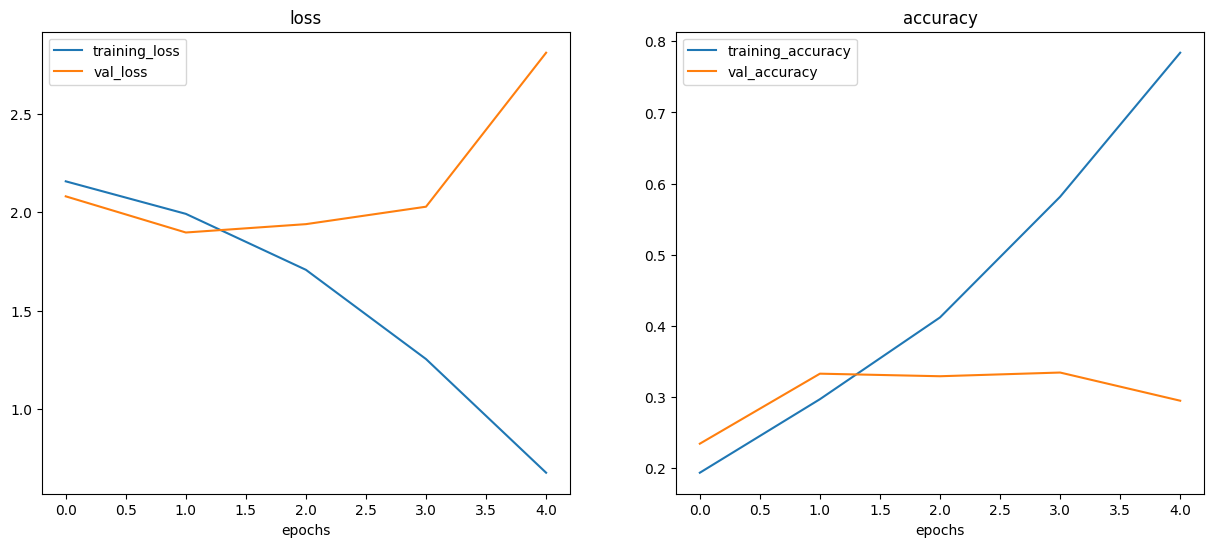

In [76]:
# Check the model loss_curve
plot_loss_curve(history_8)

It seems that model_8 is overfitting the training set quite badly... In other words, its getting great results on the training data but fails to generalize well on the unseen data
## How to fix it
* **Get more data**
* **Simplify the model**:
> Reduce number of hidden units in layers
* **Use  data augmentation**
* **Use Transfer Learning**

In [77]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [80]:
# Simplify the model by removing 2 Convolutional layers
model_9 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [79]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 119ms/step - loss: 2.3675 - accuracy: 0.1819 - val_loss: 2.0829 - val_accuracy: 0.2620
Epoch 2/5
235/235 [==============================] - 26s 111ms/step - loss: 1.9992 - accuracy: 0.3039 - val_loss: 1.9971 - val_accuracy: 0.3052
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.7044 - accuracy: 0.4207 - val_loss: 2.0169 - val_accuracy: 0.2924
Epoch 4/5
235/235 [==============================] - 26s 111ms/step - loss: 1.3792 - accuracy: 0.5452 - val_loss: 2.1386 - val_accuracy: 0.2848
Epoch 5/5
235/235 [==============================] - 30s 130ms/step - loss: 1.0244 - accuracy: 0.6705 - val_loss: 2.4005 - val_accuracy: 0.2728


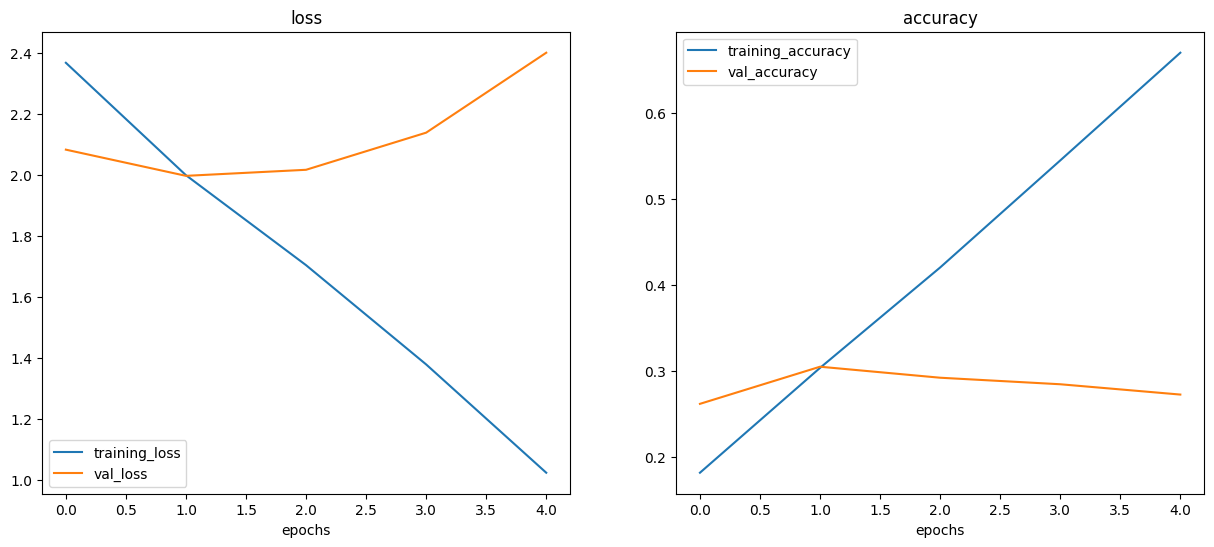

In [81]:
# Check the loss curves
plot_loss_curve(history_9)

No improvement. Try Data Augmentation

In [86]:
# Create and augmented data generator isntance
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                 rotation_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [89]:
# Create another model and fit it on the augmented data
model_10 = tf.keras.models.clone_model(model_8)

# compile the model
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [92]:
# Fit the model
history_10 = model_10.fit(train_data_aug,
                          epochs=5,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 455ms/step - loss: 2.2598 - accuracy: 0.1459 - val_loss: 2.1322 - val_accuracy: 0.2200
Epoch 2/5
235/235 [==============================] - 101s 430ms/step - loss: 2.1278 - accuracy: 0.2292 - val_loss: 1.9702 - val_accuracy: 0.3036
Epoch 3/5
235/235 [==============================] - 100s 426ms/step - loss: 2.0598 - accuracy: 0.2707 - val_loss: 1.8938 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 102s 434ms/step - loss: 1.9926 - accuracy: 0.3024 - val_loss: 1.8972 - val_accuracy: 0.3388
Epoch 5/5
235/235 [==============================] - 102s 434ms/step - loss: 1.9584 - accuracy: 0.3159 - val_loss: 1.8474 - val_accuracy: 0.3568


In [93]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 2.8099 - accuracy: 0.2948


[2.8098766803741455, 0.2948000133037567]

In [94]:
model_10.evaluate(test_data)

79/79 [==============================] - 9s 118ms/step - loss: 1.8474 - accuracy: 0.3568


[1.8474442958831787, 0.35679998993873596]

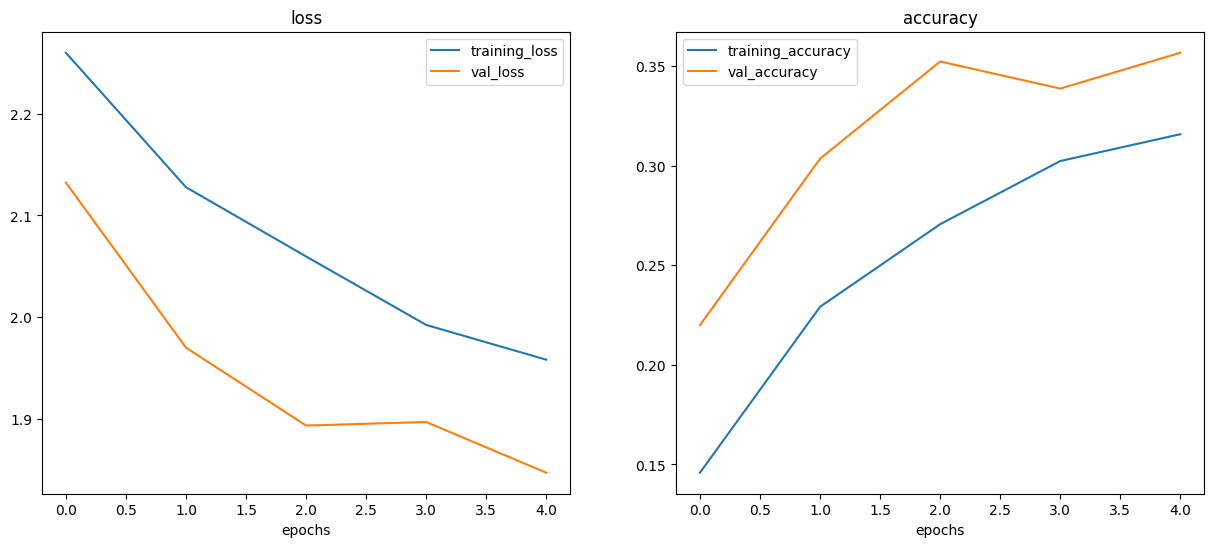

In [95]:
# Plot the loss curve
plot_loss_curve(history_10)

## Making a prediction with our trained model

In [96]:
pred_and_plot(model=model_10,
              filename='/content/pizza_dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 256ms/step


TypeError: ignored

In [107]:
# Reconfig pred_and_plot function

def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makeds a prediction with modle and plots hte image with the predicted clas as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class= class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class for binary
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction; {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


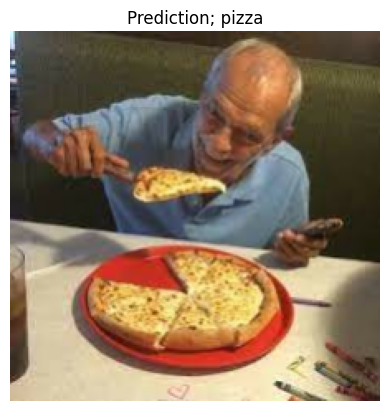

In [108]:
pred_and_plot(model=model_10,
              filename = '/content/pizza_dad.jpeg',
              class_names = class_names)